In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
data = pd.read_csv('student-mat.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [46]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [47]:
data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [50]:
male_students = len(data[data['sex'] == 'M'])
female_students = len(data[data['sex'] == 'F'])
print("Male Students: ", male_students)
print("Female Students: ", female_students)

Male Students:  187
Female Students:  208


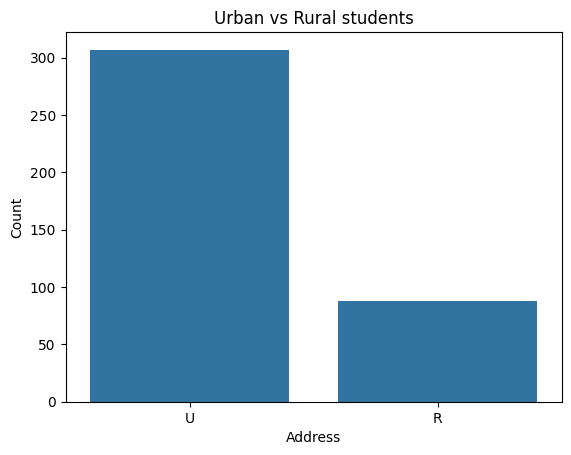

In [51]:
demo = sns.countplot(x='address', data=data)
demo.axes.set_title('Urban vs Rural students')
demo.set_xlabel('Address')
demo.set_ylabel('Count')
plt.show()

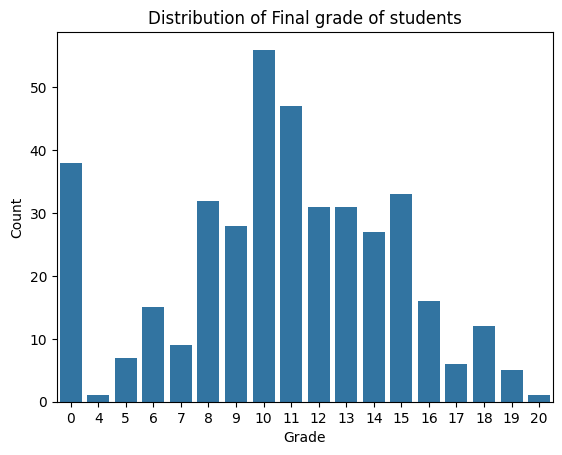

In [52]:
demo = sns.countplot(x='G3', data=data)
demo.axes.set_title('Distribution of Final grade of students')
demo.set_xlabel('Grade')
demo.set_ylabel('Count')
plt.show()

In [53]:
data['Avg_Grade'] = (data['G1'] + data['G2'] + data['G3']) / 3

In [54]:
data.drop(['school','age'], axis=1, inplace=True)

In [55]:
d= {'yes':1,'no':0}
data['schoolsup'] = data['schoolsup'].map(d)
data['famsup'] = data['famsup'].map(d)
data['paid'] = data['paid'].map(d)
data['activities'] = data['activities'].map(d)
data['nursery'] = data['nursery'].map(d)
data['higher'] = data['higher'].map(d)
data['internet'] = data['internet'].map(d)
data['romantic'] = data['romantic'].map(d)

In [56]:
d={'F':0,'M':1}
data['sex'] = data['sex'].map(d)

d={'U':0,'R':1}
data['address'] = data['address'].map(d)

d={'GT3':0,'LE3':1,'GT3':2,'LE3':3}
data['famsize'] = data['famsize'].map(d)

d={'A':0,'T':1}
data['Pstatus'] = data['Pstatus'].map(d)

d={'teacher':0,'health':1,'services':2,'at_home':3, 'other':4}
data['Mjob'] = data['Mjob'].map(d)
data['Fjob'] = data['Fjob'].map(d)

d={'home':0,'reputation':1,'course':2,'other':3}
data['reason'] = data['reason'].map(d)

d={'mother':0,'father':1,'other':2}
data['guardian'] = data['guardian'].map(d)


In [57]:
data.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Avg_Grade
0,0,0,2,0,4,4,3,0,2,0,...,3,4,1,1,3,6,5,6,6,5.666667
1,0,0,2,1,1,1,3,4,2,1,...,3,3,1,1,3,4,5,5,6,5.333333
2,0,0,3,1,1,1,3,4,3,0,...,3,2,2,3,3,10,7,8,10,8.333333
3,0,0,2,1,4,2,1,2,0,0,...,2,2,1,1,5,2,15,14,15,14.666667
4,0,0,2,1,3,3,4,4,0,1,...,3,2,1,2,5,4,6,10,10,8.666667


In [59]:
data.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'Avg_Grade'],
      dtype='object')

In [91]:
from sklearn.model_selection import train_test_split
X = data.drop(['G3','Avg_Grade'], axis=1)
Y = data['G3']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



In [159]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(alpha=0.99),
    'Elastic Net Regression': ElasticNet(alpha=0.99, positive=True),
    'Support Vector Regression': SVR(kernel='linear', C=1, epsilon=0.2),
    'Decision Tree': DecisionTreeRegressor(max_depth=6, random_state=42 ),
    'Random Forest': RandomForestRegressor(n_estimators=50, max_depth=6,min_samples_leaf=2, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=50, max_depth=6, min_samples_leaf=2,random_state=42),
    'KNN': KNeighborsRegressor( n_neighbors=4, weights='distance'),
    'Gradient Boosting': GradientBoostingRegressor( n_estimators=60, max_depth=6,min_samples_leaf=2, random_state=42 ),
    'AdaBoost': AdaBoostRegressor(n_estimators=50,random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=60,max_depth=5,min_samples_leaf=2,random_state=42)
}

In [160]:
models_data = {"Model_Name":[], "Training Score":[], "Testing Score":[],"Mean Squared Error":[], "Mean Absolute Error":[], "R2 Score":[]}
for model in models:
    models[model].fit(X_train, Y_train)
    Y_pred = models[model].predict(X_test)  
    models_data['Model_Name'].append(model)
    models_data['Training Score'].append(models[model].score(X_train, Y_train)) 
    models_data['Testing Score'].append(models[model].score(X_test, Y_test)) 
    models_data['Mean Squared Error'].append(mean_squared_error(Y_test, Y_pred))
    models_data['Mean Absolute Error'].append(mean_absolute_error(Y_test, Y_pred))
    models_data['R2 Score'].append(r2_score(Y_test, Y_pred))

In [161]:
models_df = pd.DataFrame(models_data)
models_df

,Model_Name,Training Score,Testing Score,Mean Squared Error,Mean Absolute Error,R2 Score
0,Linear Regression,0.862779,0.731900,5.497411,1.592025,0.731900
1,Ridge Regression,0.862770,0.733058,5.473659,1.585579,0.733058
2,Lasso Regression,0.828136,0.796600,4.170726,1.218411,0.796600
3,Elastic Net Regression,0.830021,0.797306,4.156240,1.255917,0.797306
4,Support Vector Regression,0.823961,0.784089,4.427267,1.100254,0.784089
5,Decision Tree,0.977627,0.723594,5.667716,1.295832,0.723594
6,Random Forest,0.967116,0.786941,4.368790,1.240345,0.786941
7,XGBoost,0.999979,0.739862,5.334142,1.316226,0.739862
8,KNN,1.000000,0.708186,5.983656,1.635190,0.708186
9,Gradient Boosting,0.999485,0.728617,5.564715,1.347511,0.728617
